# Load data from STL10 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Files already downloaded and verified


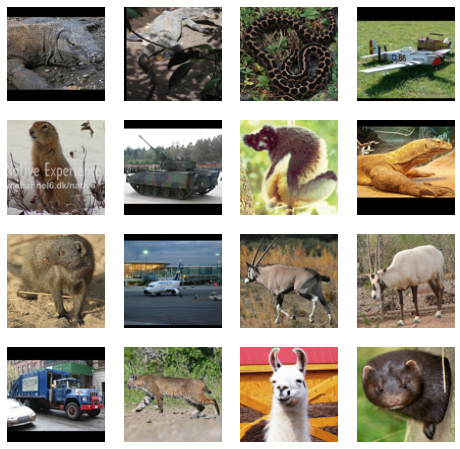

In [2]:
import torch
import matplotlib.pyplot as plt
import torchvision.datasets as dset
import torchvision
import numpy as np

%load_ext autoreload
%autoreload 2

%matplotlib inline

dataset = dset.STL10(root = './', split = 'unlabeled', transform = torchvision.transforms.ToTensor(), download = True)
n = 4
dataset_subset = torch.utils.data.Subset(dataset, np.random.choice(len(dataset), n**2, replace=False))
f, imgs = plt.subplots(n,n)
f.set_figheight(8)
f.set_figwidth(8)
for i in range(n):
    for j in range(n):
        img = dataset_subset.__getitem__(i*n+j)
        imgs[i,j].imshow(img[0].permute((1,2,0)), aspect='auto')
        imgs[i,j].axis('off')

# Transform rgb image to grayscale

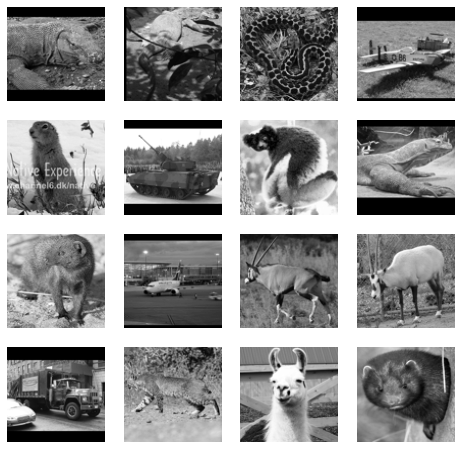

In [3]:
T = torchvision.transforms.Compose([torchvision.transforms.ToPILImage(),torchvision.transforms.Grayscale(),torchvision.transforms.ToTensor()])

f, imgs = plt.subplots(n,n)
f.set_figheight(8)
f.set_figwidth(8)
for i in range(n):
    for j in range(n):
        img = dataset_subset.__getitem__(i*n+j)
        imgs[i,j].imshow(T(img[0]).permute((1,2,0)), aspect='auto', cmap = 'gray')
        imgs[i,j].axis('off')

# Pretrain Colorizer with orginal image